# RocketML Tutorial on distributed object detection on videos

## Import Libraries

In [6]:
from rocketml.io import VideoSet, MongoWriter, Video
from rocketml.feature_extraction import ObjectDetection
from rocketml.pipeline import Pipeline
import numpy as np
import sys
import os
import pymongo
from pprint import pprint
import subprocess
from time import time

In [23]:
import tensorflow as tf; print(tf.__version__)

1.8.0


In [7]:
#Simple Generator-->To clear rerun
def simple_gen():
    for x in range(100):
        yield x
        
x=simple_gen()

In [8]:
num=next(x)#<--generate the next sequence number
num

0

## Defaults


In [13]:
default_location='/home/ubuntu/test_folder/object_detection/object_detection_models_config.json'

start = time()
filename = "/home/ubuntu/rml-notebooks/home_video_list_4.txt"
# Image Set
vm = VideoSet(filename,resize_width=64,resize_height=64,frame_rate=10)

# Get uri
hname = subprocess.check_output(["hostname"])
mongo_uri = "mongodb://"+hname.strip()+":27017"

# MongoWriter
mw = MongoWriter(uri=mongo_uri,db="rml_default_database",collection="default_collection_"+str(num))

# Object Detection
od = ObjectDetection(model_type="ssd_inception_v2_coco_2017_11_17",model_framework="tensorflow",object_detection_models_config=default_location)
#od = ObjectDetection(model_type="yolo_v2",model_framework="darknet",object_detection_models_config=test_location)



# Pipeline
pipeline = Pipeline([od,mw])
pipeline.fit(vm,cores="all",verbose=True)



print("Time for object detection = %0.2f"%(time()-start))

video
------------------
Cluster Resources
------------------
Nodes        = 1
Sockets/node = 1
Cores/socket = 1
--------------------------
Total Cores    = 1
Total Memory(GB)   = 3.86
--------------------------
Time for object detection = 84.95


## Draw objects on a single video

In [14]:
vid = Video(filename="/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4")
vid.draw_objects(mw,"/home/ubuntu/test_folder/default_video_"+str(num)+".mp4")

[u'default_collection_0', u'system.indexes']


**Inspect JSON**
--------

In [15]:
import json
with open('/home/ubuntu/test_folder/object_detection/object_detection_models_config_test.json', 'r') as fp:
    data=json.load(fp)

In [16]:
data['ssd_inception_v2_coco_2017_11_17']

{u'tensorflow': {u'channel_scale_1': 127.5,
  u'channel_scale_2': 127.5,
  u'channel_scale_3': 127.5,
  u'class_names': u'/home/ubuntu/test_folder/object_detection/ssd_inception_v2_coco_2017_11_17_class_names.json',
  u'model_binary': u'/home/ubuntu/test_folder/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/frozen_inference_graph.pb',
  u'model_config': u'/home/ubuntu/test_folder/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/ssd_mobbilenet_v1_coco_2017_11_17.pbtxt',
  u'scale_factor': 0.00784313725490196,
  u'size_x': 300.0,
  u'size_y': 300.0}}

Modify JSON
=====

In [44]:
folder='ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/'

**class name**

In [45]:
location=u'/home/ubuntu/test_folder/'
data['ssd_inception_v2_coco_2017_11_17']['tensorflow']['class_names']=location+'object_detection/ssd_inception_v2_coco_2017_11_17_class_names.json'

**model binary**

In [46]:

data['ssd_inception_v2_coco_2017_11_17']['tensorflow']['model_binary']=location+folder+'frozen_inference_graph.pb'

**model config**

In [47]:
data['ssd_inception_v2_coco_2017_11_17']['tensorflow']['model_config']=location+folder+'ssd_mobbilenet_v1_coco_2017_11_17.pbtxt'

**Export JSON**

In [48]:
with open('/home/ubuntu/test_folder/object_detection/object_detection_models_config_test.json', 'w') as fp:
    json.dump(data,fp)

**View Changes**

In [49]:
import pandas as pd
#from pprint import pprint
pd.set_option('display.max_colwidth',-1)
from pandas.io.json import json_normalize
dataset=pd.DataFrame.from_dict(json_normalize(data), orient='columns')
columns=['coco_channel_scale_1','coco_channel_scale_2','coco_channel_scale_3','coco_class_names','coco_model_binary','coco_model_config','coco_scale_factor','coco_size_x','coco_size_y','yolo_channel_scale_1','yolo_channel_scale_2','yolo_channel_scale_3','yolo_class_names','yolo_model_binary','yolo_model_config','yolo_scale_factor','yolo_size_x','yolo_size_y']
dataset.columns=columns
dataset=dataset.transpose()
dataset.rename(index=str,columns={0:'Values'},inplace=True)

In [50]:
dataset

,Values
coco_channel_scale_1,127.5
coco_channel_scale_2,127.5
coco_channel_scale_3,127.5
coco_class_names,/home/ubuntu/test_folder/object_detection/ssd_inception_v2_coco_2017_11_17_class_names.json
coco_model_binary,/home/ubuntu/test_folder/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/frozen_inference_graph.pb
coco_model_config,/home/ubuntu/test_folder/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/ssd_mobbilenet_v1_coco_2017_11_17.pbtxt
coco_scale_factor,0.00784314
coco_size_x,300
coco_size_y,300
yolo_channel_scale_1,0


In [51]:
pprint(dataset.iloc[3])

Values    /home/ubuntu/test_folder/object_detection/ssd_inception_v2_coco_2017_11_17_class_names.json
Name: coco_class_names, dtype: object


In [52]:
pprint(dataset.iloc[4])

Values    /home/ubuntu/test_folder/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/frozen_inference_graph.pb
Name: coco_model_binary, dtype: object


In [53]:
pprint(dataset.iloc[5])

Values    /home/ubuntu/test_folder/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/ssd_mobbilenet_v1_coco_2017_11_17.pbtxt
Name: coco_model_config, dtype: object


## Run Modified

In [54]:
test_location='/home/ubuntu/test_folder/object_detection/object_detection_models_config_test.json'
start = time()
filename = "/home/ubuntu/rml-notebooks/home_video_list_4.txt"
# Image Set
vm = VideoSet(filename,resize_width=64,resize_height=64,frame_rate=10)

# Get uri
hname = subprocess.check_output(["hostname"])
mongo_uri = "mongodb://"+hname.strip()+":27017"

# MongoWriter
mw = MongoWriter(uri=mongo_uri,db="rml_test_databse",collection="test_collection_"+str(num))

# Object Detection
od = ObjectDetection(model_type="ssd_inception_v2_coco_2017_11_17",model_framework="tensorflow",object_detection_models_config=test_location)

#od = ObjectDetection(model_type="yolo_v2",model_framework="darknet",object_detection_models_config=test_location)



# Pipeline
pipeline = Pipeline([od,mw])
pipeline.fit(vm,cores="all",verbose=True)


print('Test Run:',num)
print("Time for object detection = %0.2f"%(time()-start))

video
------------------
Cluster Resources
------------------
Nodes        = 1
Sockets/node = 1
Cores/socket = 1
--------------------------
Total Cores    = 1
Total Memory(GB)   = 3.86
--------------------------
('Test Run:', 0)
Time for object detection = 1.50


## Draw objects on a single video

In [47]:
vid = Video(filename="/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4")
vid.draw_objects(mw,"/home/ubuntu/test_folder/test_video_"+str(num)+".mp4")

[]


TypeError: 'NoneType' object has no attribute '__getitem__'

In [261]:
import pymongo
from pymongo import MongoClient

client = MongoClient()
client = MongoClient(mongo_uri)
db = client.rml_collection_video_tf_demo
collection = db["test_run_"+str(num)]

In [262]:
myList=[]
for i in collection.find():
    myList.append(i) 
print 'The number of indexed items:',len(myList)

The number of indexed items: 2181


In [384]:
final_ids=[]
for i in range(0,len(myList)):
    together=[]
    final_ids.append(together)
    #print(i)
    obj=myList[i]['objects']
    for j in obj:
        indices=j
        id_values=[]
        double=[]
        together.append(double)
        if 'id' in indices.keys():
            id_values.append(indices['id'])
            #print(id_values)
            double.append(id_values)
        else:
            continue

In [472]:
id_column=[]
for i in range(0,len(final_ids)):
    id_column.append(np.array(pd.Series(str(final_ids[i])).str.replace('[','').str.replace(']','')))

In [507]:
import pandas as pd
#from pprint import pprint
pd.set_option('display.max_colwidth',-1)
from pandas.io.json import json_normalize


full_dataset=pd.DataFrame(columns=['_id','file_name','fps','frame_id','height','row_id','width','objectsReturned'])

for i in range(0,len(myList)): 
    
    dataset=pd.DataFrame.from_dict(json_normalize(myList[i]), orient='columns')
    dataset.drop(columns=['objects'],inplace=True)
    dataCol=pd.Series(dataset.columns)
    dataCol=dataCol.str.replace('frame_meta_data.','')
    dataset.columns=dataCol
    dataset['objectsReturned']='something'
    
    full_dataset.loc[len(full_dataset)]=dataset.loc[0]

full_dataset['objectsReturned']=id_column

In [530]:
full_dataset.head(n=25)

,_id,file_name,fps,frame_id,height,row_id,width,objectsReturned
0,5b58281858e9ba2d120f6ef2,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,0,720,0,1280,"[16, 23]"
1,5b58281858e9ba2d120f6ef3,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,1,720,1,1280,"[16, 23]"
2,5b58281858e9ba2d120f6ef4,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,2,720,2,1280,[]
3,5b58281858e9ba2d120f6ef5,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,3,720,3,1280,[]
4,5b58281858e9ba2d120f6ef6,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,4,720,4,1280,[16]
5,5b58281858e9ba2d120f6ef7,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,5,720,5,1280,[16]
6,5b58281858e9ba2d120f6ef8,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,6,720,6,1280,[21]
7,5b58281858e9ba2d120f6ef9,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,7,720,7,1280,[21]
8,5b58281858e9ba2d120f6efa,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,8,720,8,1280,[21]
9,5b58281858e9ba2d120f6efb,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,25.0,9,720,9,1280,[21]


Inspect Items
-----

In [532]:
RequestItem=0

In [533]:
myList[0]

{u'_id': ObjectId('5b58281858e9ba2d120f6ef2'),
 u'frame_meta_data': {u'file_name': u'/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4',
  u'fps': 25.0,
  u'frame_id': 0,
  u'height': 720,
  u'row_id': 0,
  u'width': 1280},
 u'objects': [{u'confidence': 0.258360534906387,
   u'height': 288.673950195312,
   u'id': 16,
   u'name': u'bird',
   u'width': 181.070068359375,
   u'x_center': 159.617218017578,
   u'y_center': 385.527770996094},
  {u'confidence': 0.260805279016495,
   u'height': 610.177062988281,
   u'id': 23,
   u'name': u'bear',
   u'width': 1043.73266601562,
   u'x_center': 545.624267578125,
   u'y_center': 308.561065673828}]}

Objects MetaData
----

In [534]:
import pandas as pd
#from pprint import pprint
pd.set_option('display.max_colwidth',-1)
from pandas.io.json import json_normalize
dataset=pd.DataFrame.from_dict(json_normalize(myList[RequestItem]), orient='columns')
heading=dataset['_id']
dataset.drop(columns=['objects','_id'],inplace=True)
dataset=dataset.transpose()
dataset.columns=heading
dataset.reset_index(inplace=True)
dataset['index']=dataset['index'].str.replace('frame_meta_data.','')
dataset.rename(columns={'index':'meta_frame'},inplace=True)
#dataset

Items found in frame
------

Needs a condition that checks if there were objects found

In [535]:
objects=pd.DataFrame.from_dict(json_normalize(myList[RequestItem]['objects']), orient='columns')
names=list(objects['name'])
objects.drop(columns=['name'],inplace=True)
objects=objects.transpose()
objects.columns=names
objects.reset_index(inplace=True)
objects.rename(columns={'index':'found_items'},inplace=True)
objects

,found_items,bird,bear
0,confidence,0.258361,0.260805
1,height,288.673950,610.177063
2,id,16.000000,23.000000
3,width,181.070068,1043.732666
4,x_center,159.617218,545.624268
5,y_center,385.527771,308.561066


In [536]:
pd.concat([dataset, objects], axis=1)

,meta_frame,5b58281858e9ba2d120f6ef2,found_items,bird,bear
0,file_name,/home/ubuntu/s3_mount/SampleVideo_1280x720_10mb.mp4,confidence,0.258361,0.260805
1,fps,25,height,288.673950,610.177063
2,frame_id,0,id,16.000000,23.000000
3,height,720,width,181.070068,1043.732666
4,row_id,0,x_center,159.617218,545.624268
5,width,1280,y_center,385.527771,308.561066


In [54]:
help(od)

Help on ObjectDetection in module rocketml.feature_extraction.object_detection object:

class ObjectDetection(rocketml.base.Node)
 |  Detects object using Pre-built Deep Learning Models
 |  
 |  Method resolution order:
 |      ObjectDetection
 |      rocketml.base.Node
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model_type='yolo_v2', model_framework='darknet', min_confidence=0.24, dump_json=False, dump_json_prefix='/tmp/jobs_folder/object_detection', object_detection_models_config='/etc/rocketml.d/object_detection/object_detection_models_config.json', **kwargs)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from rocketml.base.Node:
 |  
 |  get_app_info(self, data_type, _type='')
 |      Method to get a list of app names, app data types, and conig files matching this node
 |  
 |  to_dict(self)
 |      Return node as a dictionary
 |  
 |  -------------------------------------------------------

## Testing Ground


In [16]:
#!pip install --user matplotlib

In [35]:
import cv2 as cv
cv.__version__

'3.4.1-dev'

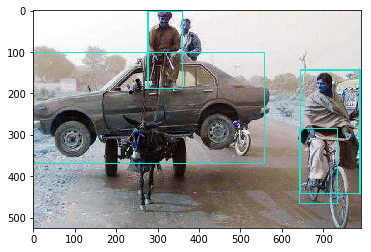

In [41]:
import cv2 as cv
import matplotlib.pyplot as plt
location1='/home/ubuntu/test_folder/ssd_mobilenet_v1_coco_2017_11_17/'
location2='/home/ubuntu/test_folder/ssd_inception_v2_coco_2017_11_17/'

cvNet = cv.dnn.readNetFromTensorflow(location1+'frozen_inference_graph.pb', location1+'ssd_mobilenet_v1_coco_2017_11_17.pbtxt')

img = cv.imread('picture1.jpg')
rows = img.shape[0]
cols = img.shape[1]
cvNet.setInput(cv.dnn.blobFromImage(img, 1.0/127.5, (300, 300), (127.5, 127.5, 127.5), swapRB=True, crop=False))
cvOut = cvNet.forward()

for detection in cvOut[0,0,:,:]:
    score = float(detection[2])
    if score > 0.3:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        cv.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), (23, 230, 210), thickness=2)

plt.imshow(img)
plt.show()